In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Read dataset

In [5]:
#your code here
diamonds = pd.read_csv('data/diamonds.csv', index_col=False)

In [6]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


# Model Based on Mean Price

## Calculate Mean Price

In [471]:
mean_price = diamonds.price.mean()

## Price Prediction

In [472]:
# Predicted price == mean

In [473]:
y_pred = [mean_price for price in diamonds.price]
y_pred

[3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,
 3934.409644462607,


## Visualizing results

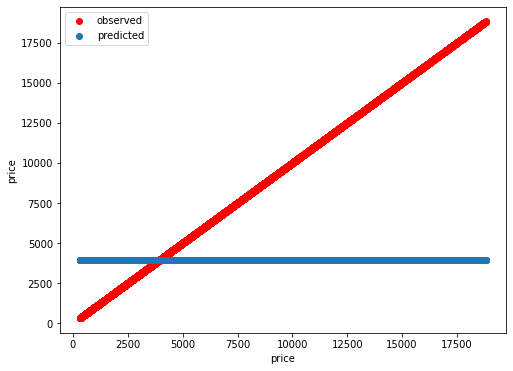

In [474]:
X = diamonds.price
y = diamonds.price
plt.figure(figsize=(8,6))
plt.xlabel('price')
plt.ylabel('price')
plt.scatter(X, y, color='red', label='observed')
# plot the predicted values together with the observed values
plt.scatter(X, y_pred, label='predicted')


plt.legend()

## calculating mean squared error

In [475]:
from sklearn.metrics import mean_squared_error

In [476]:
mean_squared_error(y, y_pred)

15914459.460838739

In [477]:
np.sqrt(15914459.460838739)

3989.293102899151

## Predicting Rick's diamonds

In [478]:
ricks = pd.read_csv('data/rick_diamonds.csv')

In [479]:
ricks.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.40,57.00,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.30,61.00,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.80,56.00,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.30,56.00,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.60,57.00,8.44,8.37,5.18


In [480]:
ricks['price_est'] = [mean_price for dia in ricks.carat]

In [481]:
ricks.head()

,carat,cut,color,clarity,depth,table,x,y,z,price_est
0,0.91,Very Good,H,SI2,63.40,57.00,6.10,6.18,3.89,3934.41
1,0.38,Good,F,VS2,60.30,61.00,4.68,4.71,2.83,3934.41
2,0.52,Ideal,H,VS2,61.80,56.00,5.19,5.16,3.20,3934.41
3,1.10,Ideal,G,VS1,61.30,56.00,6.65,6.69,4.09,3934.41
4,2.28,Ideal,G,SI2,61.60,57.00,8.44,8.37,5.18,3934.41


In [93]:
ricks.to_csv('data/ricks_mean_price_est.csv')

# Regression Model

In [482]:
from sklearn.linear_model import LinearRegression

## Transforming categoricals into numbers

In [492]:
diamonds['cut_mdl'] = diamonds['cut'].apply(lambda x: cuts.get(x))
diamonds['color_mdl'] = diamonds['color'].apply(lambda x: colors.get(x))
diamonds['clarity_mdl'] = diamonds['clarity'].apply(lambda x: clarity.get(x))

In [493]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_mdl,color_mdl,clarity_mdl
0,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31,3,5,2
1,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31,1,5,4
2,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63,3,1,3
3,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75,1,0,1
4,0.24,Very Good,J,VVS2,62.80,57.00,336,3.94,3.96,2.48,2,0,5


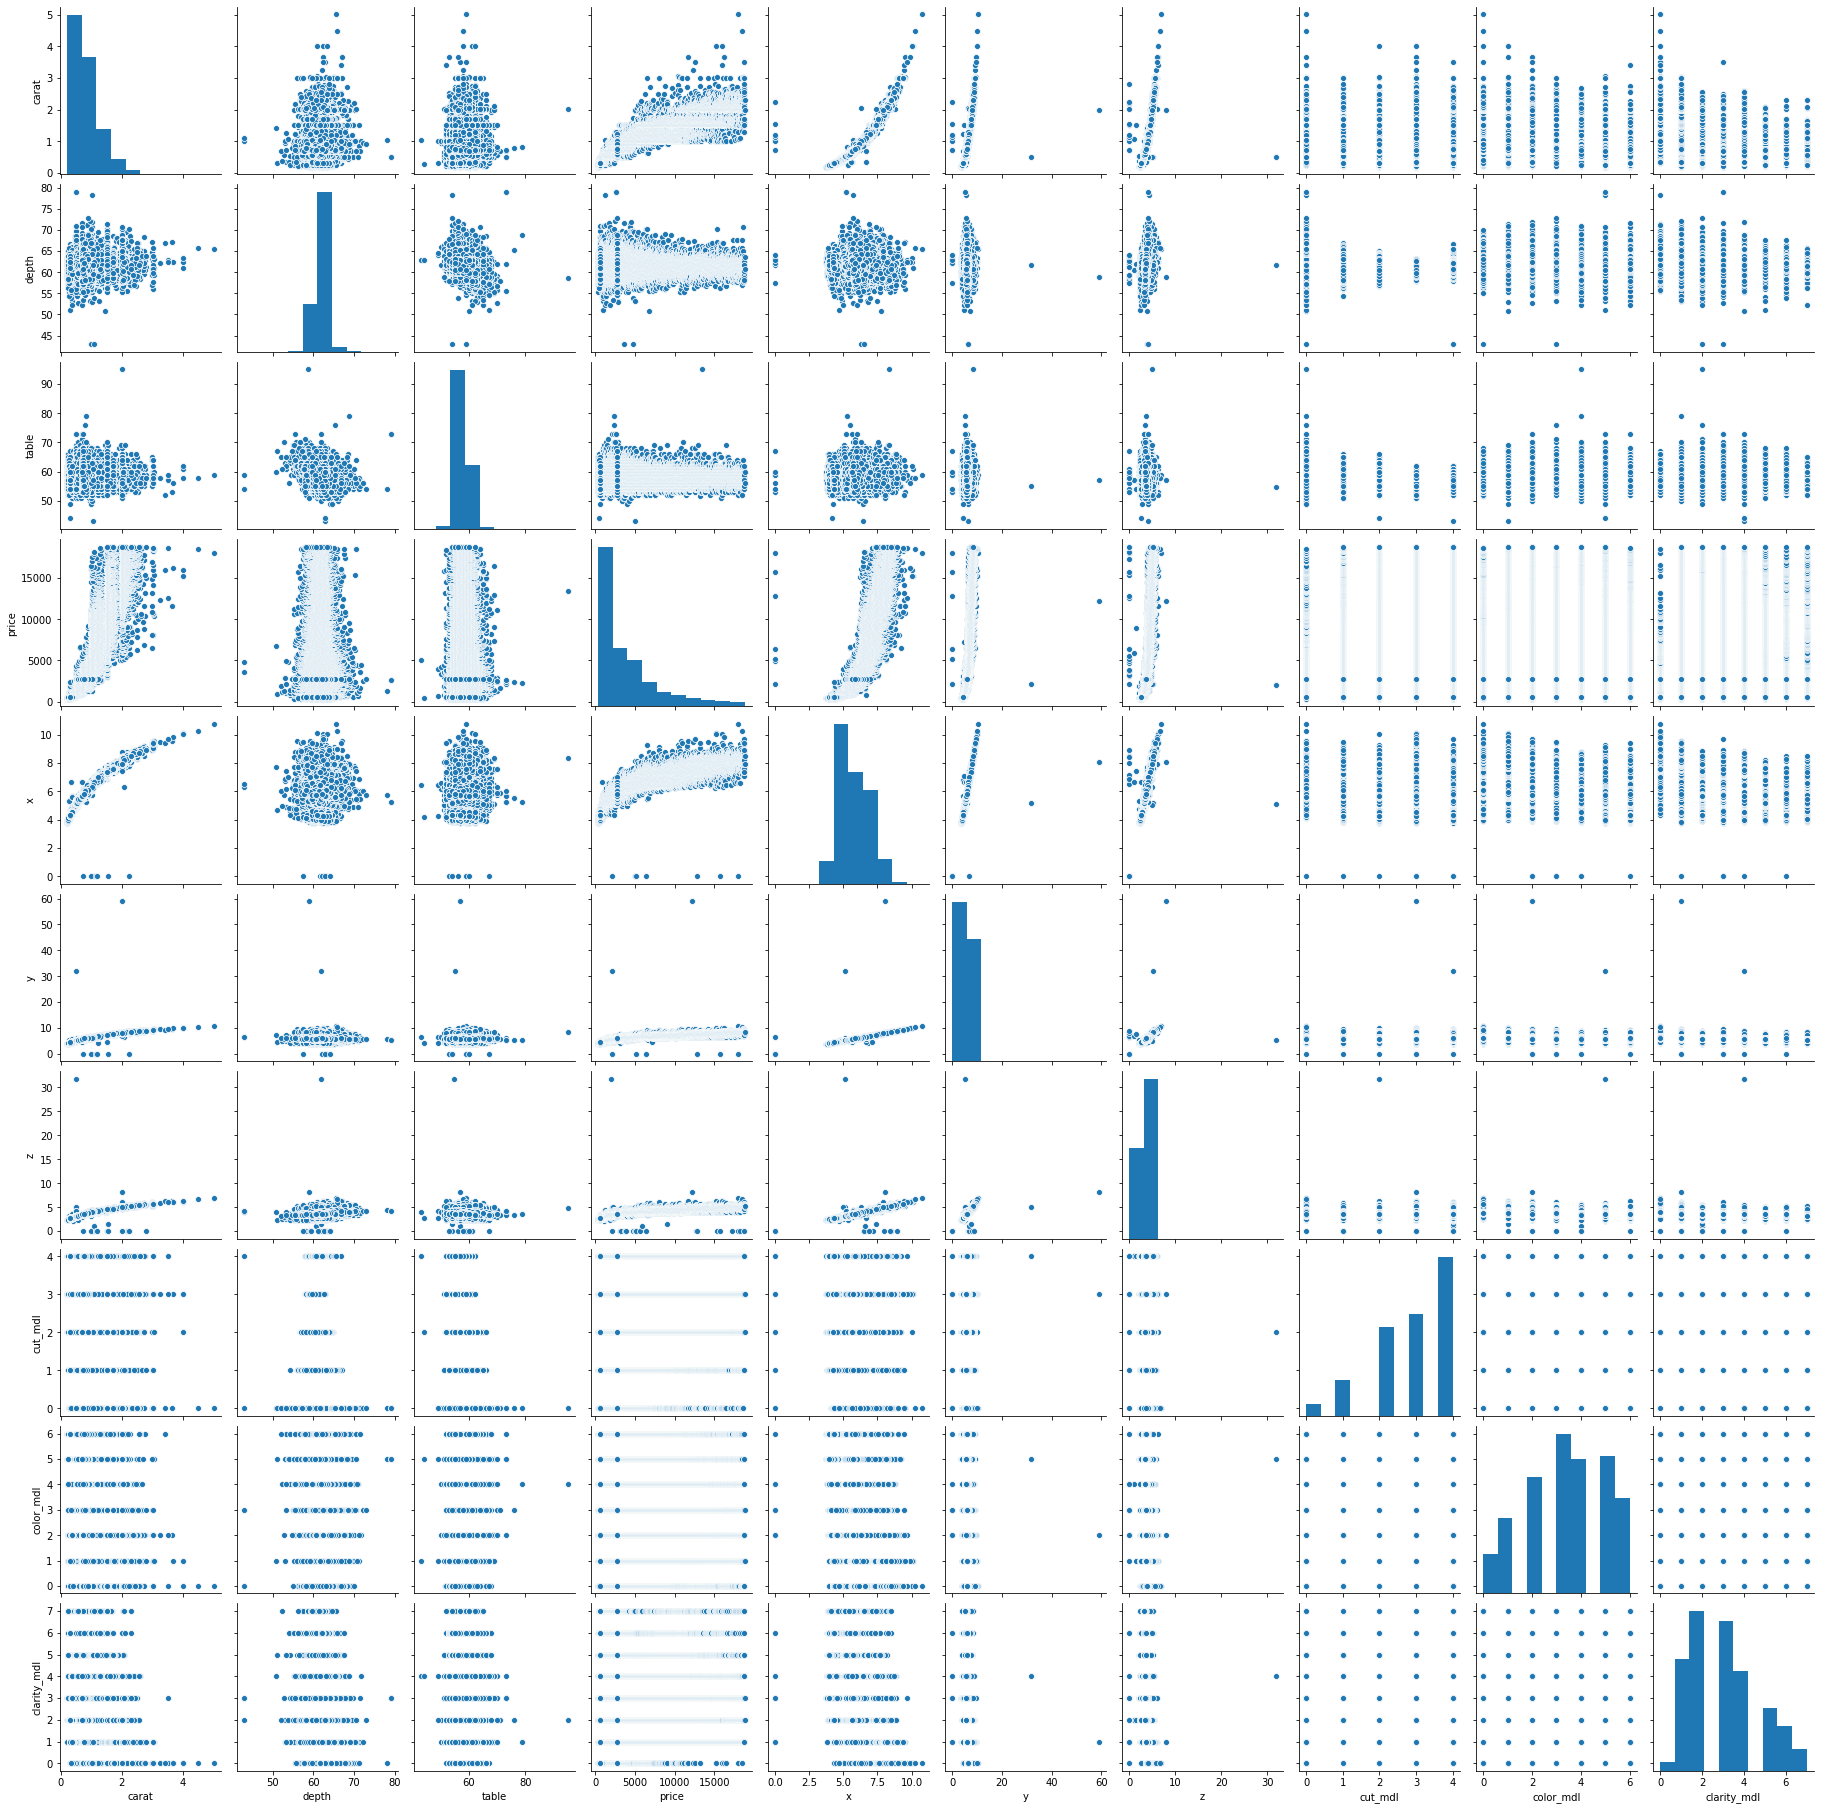

In [494]:
sns.pairplot(diamonds)

In [495]:
# testing model: 

X = diamonds[['cut_mdl', 'color_mdl', 'clarity_mdl']]
y = diamonds['price']
lb_enc = test_model(X,y)
lb_enc

('3880.29', '0.05')

In [496]:
np.sqrt(float(lb_enc[0]))

62.29197380080358

## Transforming categoricals into flags

In [497]:
diamonds_model = diamonds.copy()

In [498]:
fl = pd.get_dummies(diamonds[['cut','color','clarity']].astype(str))
fl.head()

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [499]:
fl.shape

(48940, 20)

In [500]:
diamonds_model = pd.concat([diamonds_model, fl], axis=1)

In [501]:
diamonds_model.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31,...,0,0,0,0,1,0,0,0,0,0
1,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31,...,0,0,0,0,0,0,1,0,0,0
2,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63,...,1,0,0,0,0,0,0,1,0,0
3,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75,...,0,1,0,0,0,1,0,0,0,0
4,0.24,Very Good,J,VVS2,62.80,57.00,336,3.94,3.96,2.48,...,0,1,0,0,0,0,0,0,0,1


In [502]:
X = diamonds_model[list(fl.columns)]
y = diamonds_model['price']
model_fl = test_model(X,y)
model_fl

('3855.30', '0.07')

In [503]:
np.sqrt(float(model_fl[0]))

62.09106215873586

In [504]:
# There's no much difference using categorical data, but it's a little better

## Testing each column individually

In [505]:
not_comparable = ['price','cut', 'color', 'clarity']

In [506]:
columns = [col for col in list(diamonds_model.columns) if col not in not_comparable ]

In [507]:
columns

['carat',
 'depth',
 'table',
 'x',
 'y',
 'z',
 'cut_mdl',
 'color_mdl',
 'clarity_mdl',
 'cut_Fair',
 'cut_Good',
 'cut_Ideal',
 'cut_Premium',
 'cut_Very Good',
 'color_D',
 'color_E',
 'color_F',
 'color_G',
 'color_H',
 'color_I',
 'color_J',
 'clarity_I1',
 'clarity_IF',
 'clarity_SI1',
 'clarity_SI2',
 'clarity_VS1',
 'clarity_VS2',
 'clarity_VVS1',
 'clarity_VVS2']

In [512]:
results = []
for col in columns:
    X = diamonds_model[[col]]
    y = diamonds_model['price']
    result = test_model(X,y)    
    error = result[0]
    r2 = result[1]
    results.append([col, error, r2])

In [513]:
pd.options.display.float_format = "{:.2f}".format
pd.DataFrame(results, columns=['feature', 'error', 'r2_score']).sort_values(by='r2_score', ascending=False)

,feature,error,r2_score
0,carat,1542.85,0.85
3,x,1857.24,0.78
4,y,2008.17,0.75
5,z,2034.05,0.74
7,color_mdl,3929.05,0.03
2,table,3956.56,0.02
8,clarity_mdl,3944.96,0.02
24,clarity_SI2,3955.47,0.02
15,color_E,3969.53,0.01
27,clarity_VVS1,3971.05,0.01


In [88]:
# carat and sizes seem to show less errors

## Testing in pairs

In [514]:
## carat
X = diamonds_model[['carat']]
y = diamonds_model['price']
carat_mdl = test_model(X,y)
carat_mdl

('1542.85', '0.85')

In [515]:
## carat, x, y, z
X = diamonds_model[['carat','x','y','z']]
y = diamonds_model['price']
c_xyz = test_model(X,y)
c_xyz

('1518.12', '0.86')

In [516]:
## carat, color 
X = diamonds_model[['carat','color_mdl']]
y = diamonds_model['price']
carat_color = test_model(X,y)
carat_color

('1489.79', '0.86')

In [517]:
## carat, cut
X = diamonds_model[['carat','cut_mdl']]
y = diamonds_model['price']
carat_cut = test_model(X,y)
carat_cut

('1516.53', '0.86')

In [518]:
## carat, clarity
X = diamonds_model[['carat','clarity_mdl']]
y = diamonds_model['price']
carat_clarity = test_model(X,y)
carat_clarity

('1344.00', '0.89')

In [519]:
## carat, clarity
X = diamonds_model[['carat','clarity_mdl','color_mdl','cut_mdl']]
y = diamonds_model['price']
cccc = test_model(X,y)
cccc

('1229.87', '0.90')

In [520]:
## carat, clarity
X = diamonds_model[['carat','clarity_mdl','color_mdl','cut_mdl']]
y = diamonds_model['price']
cccc=LinearRegression()
cccc.fit(X,y)
y_pred = cccc.predict(X)
y_pred

array([-1259.46214727,  -346.82747684, -1312.05013437, ...,
        3231.36881407,  3210.77077612,  3436.80899717])

In [521]:
# It seems like clarity is the variable that has greater impact on the model
# Order: clarity > color > cut

In [522]:
## VISUALIZATION

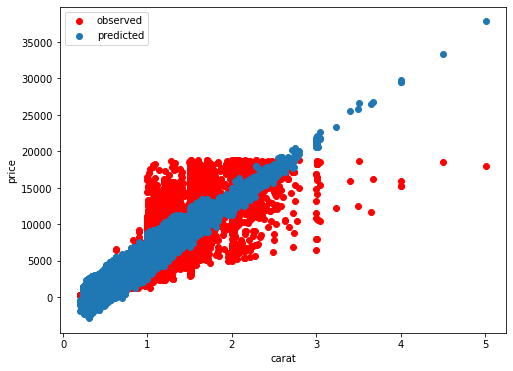

In [523]:
X = diamonds_model.carat
y= diamonds_model.price
plt.figure(figsize=(8,6))
plt.xlabel('carat')
plt.ylabel('price')
plt.scatter(X, y, color='red', label='observed')
# plot the predicted values together with the observed values
X = diamonds_model[['carat']]
plt.scatter(X, y_pred, label='predicted')


plt.legend()

# Cleaning Some data

In [524]:
# There aren't any NAN values
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        48940 non-null  float64
 1   cut          48940 non-null  object 
 2   color        48940 non-null  object 
 3   clarity      48940 non-null  object 
 4   depth        48940 non-null  float64
 5   table        48940 non-null  float64
 6   price        48940 non-null  int64  
 7   x            48940 non-null  float64
 8   y            48940 non-null  float64
 9   z            48940 non-null  float64
 10  cut_mdl      48940 non-null  int64  
 11  color_mdl    48940 non-null  int64  
 12  clarity_mdl  48940 non-null  int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 4.9+ MB


## Information

In [189]:
# There's a strange 0 value in all sizes columns
diamonds.describe()

,carat,depth,table,price,x,y,z,cut_mdl,color_mdl,clarity_mdl
count,48940.00,48940.00,48940.00,48940.00,48940.00,48940.00,48940.00,48940.00,48940.00,48940.00
mean,0.80,61.75,57.45,3934.41,5.73,5.73,3.54,2.91,3.41,3.06
std,0.47,1.43,2.23,3989.33,1.12,1.15,0.71,1.12,1.70,1.65
min,0.20,43.00,43.00,326.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.40,61.00,56.00,949.00,4.71,4.72,2.91,2.00,2.00,2.00
50%,0.70,61.80,57.00,2401.00,5.69,5.71,3.52,3.00,3.00,3.00
75%,1.04,62.50,59.00,5331.25,6.54,6.54,4.04,4.00,5.00,4.00
max,5.01,79.00,95.00,18823.00,10.74,58.90,31.80,4.00,6.00,7.00


In [202]:
# There are only 6 rows with no values for x,y,z
null_xyz = diamonds.loc[(diamonds['x']==0)&(diamonds['y']==0)&(diamonds['z']==0), :]
null_xyz

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_mdl,color_mdl,clarity_mdl
10825,1.00,Very Good,H,VS2,63.30,53.00,5139,0.00,0.00,0.00,2,2,3
14433,1.14,Fair,G,VS1,57.50,67.00,6381,0.00,0.00,0.00,0,3,4
22240,1.56,Ideal,G,VS2,62.20,54.00,12800,0.00,0.00,0.00,4,3,3
23795,1.20,Premium,D,VVS1,62.10,59.00,15686,0.00,0.00,0.00,3,6,6
24864,2.25,Premium,H,SI2,62.80,59.00,18034,0.00,0.00,0.00,3,2,1
44936,0.71,Good,F,SI2,64.10,60.00,2130,0.00,0.00,0.00,1,4,1


In [203]:
# Since they represent less than 1% of the database, rows will be droped:

len(null_xyz)/diamonds.shape[0]

0.00012259910093992643

In [208]:
diamonds = diamonds.drop(list(null_xyz.index)).reset_index(drop=True)

In [210]:
diamonds.shape

(48934, 13)

In [283]:
# Deleting rows with 2 null sizes (x, y or z)
diamonds.loc[(diamonds['z']==0)|(diamonds['y']==0)|(diamonds['z']==0), :]

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_mdl,color_mdl,clarity_mdl
2010,1.00,Premium,G,SI2,59.10,59.00,3142,6.55,6.48,0.00,3,3,1
2104,1.01,Premium,H,I1,58.10,59.00,3167,6.66,6.60,0.00,3,2,0
4323,1.10,Premium,G,SI2,63.00,59.00,3696,6.50,6.47,0.00,3,3,1
4941,1.01,Premium,F,SI2,59.20,58.00,3837,6.50,6.47,0.00,3,4,1
9187,1.50,Good,G,I1,64.00,61.00,4731,7.15,7.04,0.00,1,3,0
12288,1.15,Ideal,G,VS2,59.20,56.00,5564,6.88,6.83,0.00,4,3,3
22123,2.18,Premium,H,SI2,59.40,61.00,12631,8.49,8.45,0.00,3,2,1
23687,2.25,Premium,I,SI1,61.30,58.00,15397,8.52,8.42,0.00,3,1,2
24568,2.20,Premium,H,SI1,61.20,59.00,17265,8.42,8.37,0.00,3,2,2
24928,2.02,Premium,H,VS2,62.70,53.00,18207,8.02,7.95,0.00,3,2,3


In [281]:
diamonds = diamonds.drop(10119).reset_index(drop=True)

In [282]:
diamonds.shape

(48933, 13)

In [284]:
# filling empy 'z' columns through depth function:

In [324]:
null_z = diamonds.loc[(diamonds['z']==0)|(diamonds['y']==0)|(diamonds['z']==0), :]

In [326]:
null_z.index

Int64Index([2010, 2104, 4323, 4941, 9187, 12288, 22123, 23687, 24568, 24928], dtype='int64')

In [332]:
[diamonds.loc[row, 'z'] == calculate_z (row) for row in null_z.index]

[True, True, True, True, True, True, True, True, True, True]

In [334]:
# defining function that fills null z values in dataset

def calculate_z(row_index):
    row = diamonds.loc[row_index]
    calc_z = row.depth * np.mean([row.x, row.y])/100
    return calc_z 

In [381]:
diamonds.shape

(48933, 13)

## Testing model after clean up

In [525]:
X = diamonds[['carat','x','y','z']]
y = diamonds.price

In [526]:
test_model(X,y)

('1518.12', '0.86')

In [528]:
2304689.7682704725, 0.8551826548717094

(2304689.7682704725, 0.8551826548717094)

In [97]:
# Em termos de $, o modelo piorou depois de limpar o dataset, mudanças serão desconsideradas

# Outliers analysis

In [529]:
diamonds_model.describe()

,carat,depth,table,price,x,y,z,cut_mdl,color_mdl,clarity_mdl,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,48940.00,48940.00,48940.00,48940.00,48940.00,48940.00,48940.00,48940.00,48940.00,48940.00,...,48940.00,48940.00,48940.00,48940.00,48940.00,48940.00,48940.00,48940.00,48940.00,48940.00
mean,0.80,61.75,57.45,3934.41,5.73,5.73,3.54,2.91,3.41,3.06,...,0.10,0.05,0.01,0.03,0.24,0.17,0.15,0.23,0.07,0.09
std,0.47,1.43,2.23,3989.33,1.12,1.15,0.71,1.12,1.70,1.65,...,0.30,0.22,0.12,0.18,0.43,0.38,0.36,0.42,0.25,0.29
min,0.20,43.00,43.00,326.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.40,61.00,56.00,949.00,4.71,4.72,2.91,2.00,2.00,2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.70,61.80,57.00,2401.00,5.69,5.71,3.52,3.00,3.00,3.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.04,62.50,59.00,5331.25,6.54,6.54,4.04,4.00,5.00,4.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,5.01,79.00,95.00,18823.00,10.74,58.90,31.80,4.00,6.00,7.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## X/Y/Z Outliers

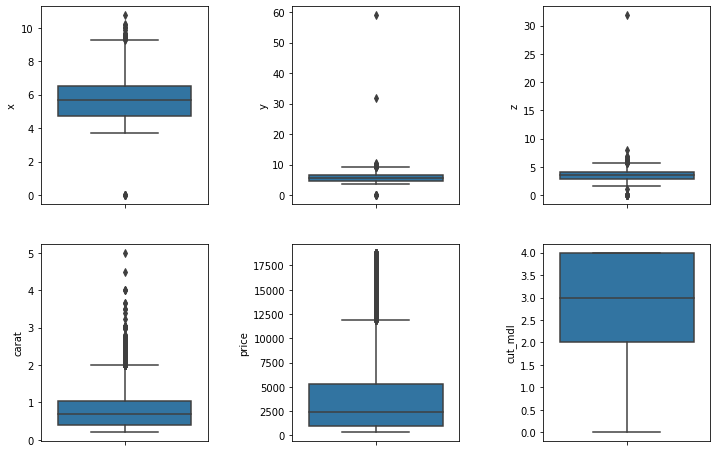

In [530]:
fig, ax = plt.subplots(2,3, figsize=(12, 8))
sns.boxplot(y=diamonds_model.x, ax=ax[0,0])
sns.boxplot(y=diamonds_model.y, ax=ax[0,1])
sns.boxplot(y=diamonds_model.z, ax=ax[0,2])
sns.boxplot(y=diamonds_model.carat, ax=ax[1,0])
sns.boxplot(y=diamonds_model.price, ax=ax[1,1])
sns.boxplot(y=diamonds_model.cut_mdl, ax=ax[1,2])

plt.subplots_adjust(wspace=0.5)

In [531]:
# X
x_stats = diamonds_model.x.describe()
x_out = find_outliers(x_stats)
x_out

[1.9649999999999999, 9.285]

In [532]:
# z 
z_stats = diamonds_model.z.describe()
z_out = find_outliers(z_stats)
z_out

[1.2150000000000003, 5.734999999999999]

In [533]:
# y
y_stats = diamonds_model.y.describe()
y_out = find_outliers(y_stats)
y_out

[1.9899999999999993, 9.27]

In [534]:
diamonds_model.shape

(48940, 33)

In [535]:
# COLUMN NAMES

In [536]:
diamonds_model.columns = [col.lower().replace(' ', '_') for col in diamonds_model.columns]

In [537]:
# SELECTING ONLY NON OUTLIERS
no_xyz_out = diamonds_model.query (f'x >= {x_out[0]} & x <= {x_out[1]} | z >= {z_out[0]} & z <= {z_out[1]} | y >= {y_out[0]} & y <= {y_out[1]}')

In [538]:
no_xyz_out.describe()

,carat,depth,table,price,x,y,z,cut_mdl,color_mdl,clarity_mdl,...,color_i,color_j,clarity_i1,clarity_if,clarity_si1,clarity_si2,clarity_vs1,clarity_vs2,clarity_vvs1,clarity_vvs2
count,48923.00,48923.00,48923.00,48923.00,48923.00,48923.00,48923.00,48923.00,48923.00,48923.00,...,48923.00,48923.00,48923.00,48923.00,48923.00,48923.00,48923.00,48923.00,48923.00,48923.00
mean,0.80,61.75,57.45,3931.06,5.73,5.73,3.54,2.91,3.41,3.06,...,0.10,0.05,0.01,0.03,0.24,0.17,0.15,0.23,0.07,0.09
std,0.47,1.43,2.23,3985.01,1.12,1.14,0.70,1.12,1.70,1.65,...,0.30,0.22,0.11,0.18,0.43,0.38,0.36,0.42,0.25,0.29
min,0.20,43.00,43.00,326.00,0.00,3.68,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.40,61.00,56.00,949.00,4.71,4.72,2.91,2.00,2.00,2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.70,61.80,57.00,2400.00,5.69,5.71,3.52,3.00,3.00,3.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.04,62.50,59.00,5330.00,6.54,6.54,4.03,4.00,5.00,4.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,3.05,79.00,95.00,18823.00,9.54,58.90,31.80,4.00,6.00,7.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [539]:
xyz_out =  diamonds_model.query (f'x < {x_out[0]} | x > {x_out[1]} | z < {z_out[0]} | z > {z_out[1]} | y < {y_out[0]} | y > {y_out[1]}')
xyz_out.describe()

,carat,depth,table,price,x,y,z,cut_mdl,color_mdl,clarity_mdl,...,color_i,color_j,clarity_i1,clarity_if,clarity_si1,clarity_si2,clarity_vs1,clarity_vs2,clarity_vvs1,clarity_vvs2
count,56.00,56.00,56.00,56.00,56.00,56.00,56.00,56.00,56.00,56.00,...,56.00,56.00,56.00,56.00,56.00,56.00,56.00,56.00,56.00,56.00
mean,2.53,62.16,58.37,12532.62,7.62,9.06,4.40,2.07,2.05,1.11,...,0.25,0.16,0.38,0.00,0.05,0.41,0.05,0.09,0.02,0.00
std,1.07,2.80,3.07,5615.21,3.14,8.06,4.68,1.40,1.57,1.32,...,0.44,0.37,0.49,0.00,0.23,0.50,0.23,0.29,0.13,0.00
min,0.51,56.10,52.00,1970.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.54,59.77,56.00,6780.50,6.83,6.99,0.00,1.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,3.00,62.30,58.50,14569.00,9.03,9.01,5.62,3.00,2.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,3.01,63.92,60.00,18022.00,9.42,9.38,5.92,3.00,3.00,1.00,...,0.25,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
max,5.01,68.20,67.00,18788.00,10.74,58.90,31.80,4.00,6.00,6.00,...,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00


### Testing Model

In [540]:
# for non outlier xyz

X = no_xyz_out[['carat','cut_fair', 'cut_good', 'cut_ideal', 'cut_premium', 'cut_very_good', 'color_d', 'color_e', 'color_f', 'color_g', 'color_h', 'color_i', 'color_j', 'clarity_i1', 'clarity_if', 'clarity_si1', 'clarity_si2', 'clarity_vs1', 'clarity_vs2', 'clarity_vvs1', 'clarity_vvs2']]
y = no_xyz_out.price
no_xyz_out_model = test_model(X,y)
no_xyz_out_model

('1139.88', '0.92')

In [541]:
# for outlier xyz

X = xyz_out[['carat','cut_fair', 'cut_good', 'cut_ideal', 'cut_premium', 'cut_very_good', 'color_d', 'color_e', 'color_f', 'color_g', 'color_h', 'color_i', 'color_j', 'clarity_i1', 'clarity_if', 'clarity_si1', 'clarity_si2', 'clarity_vs1', 'clarity_vs2', 'clarity_vvs1', 'clarity_vvs2']]
y = xyz_out.price
xyz_out_model = test_model(X,y)
xyz_out_model

('1971.55', '0.87')

In [544]:
# comparing to best fit until now, removing the outliers is better

## carat, clarity
X = diamonds_model[['carat','clarity_mdl','color_mdl','cut_mdl']]
y = diamonds_model['price']
cccc = test_model(X,y)
cccc

('1229.87', '0.90')

## Carat Outlier

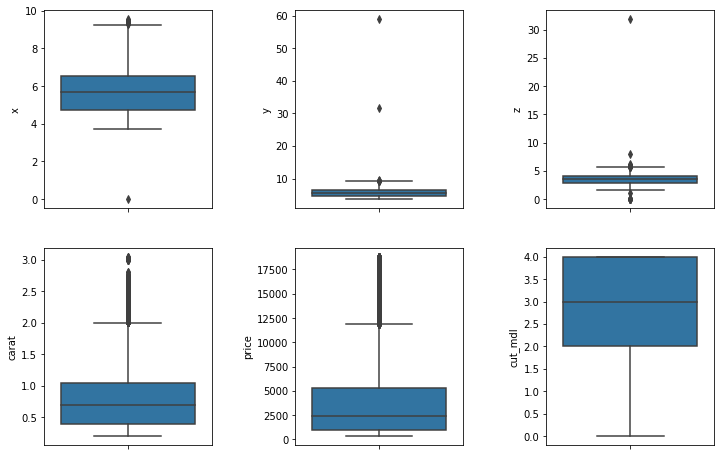

In [545]:
fig, ax = plt.subplots(2,3, figsize=(12, 8))
sns.boxplot(y=no_xyz_out.x, ax=ax[0,0])
sns.boxplot(y=no_xyz_out.y, ax=ax[0,1])
sns.boxplot(y=no_xyz_out.z, ax=ax[0,2])
sns.boxplot(y=no_xyz_out.carat, ax=ax[1,0])
sns.boxplot(y=no_xyz_out.price, ax=ax[1,1])
sns.boxplot(y=no_xyz_out.cut_mdl, ax=ax[1,2])

plt.subplots_adjust(wspace=0.5)

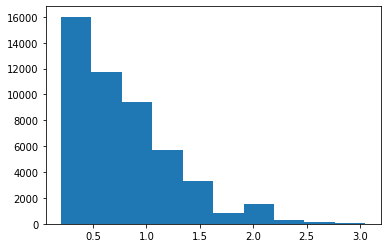

In [546]:
plt.hist(no_xyz_out.carat);

In [547]:
carat_stats = no_xyz_out.carat.describe()
carat_stats

count   48923.00
mean        0.80
std         0.47
min         0.20
25%         0.40
50%         0.70
75%         1.04
max         3.05
Name: carat, dtype: float64

In [548]:
carat_outliers = find_outliers(carat_stats)
carat_outliers

[-0.5599999999999999, 2.0]

In [549]:
# SELECTING ONLY NON OUTLIERS
carat_df = no_xyz_out.query (f'carat <= {carat_outliers[1]}')
carat_df.describe()

,carat,depth,table,price,x,y,z,cut_mdl,color_mdl,clarity_mdl,...,color_i,color_j,clarity_i1,clarity_if,clarity_si1,clarity_si2,clarity_vs1,clarity_vs2,clarity_vvs1,clarity_vvs2
count,47221.00,47221.00,47221.00,47221.00,47221.00,47221.00,47221.00,47221.00,47221.00,47221.00,...,47221.00,47221.00,47221.00,47221.00,47221.00,47221.00,47221.00,47221.00,47221.00,47221.00
mean,0.75,61.75,57.42,3533.58,5.64,5.64,3.48,2.91,3.47,3.11,...,0.09,0.05,0.01,0.03,0.24,0.16,0.16,0.23,0.07,0.10
std,0.40,1.42,2.22,3412.88,1.03,1.06,0.65,1.12,1.68,1.64,...,0.29,0.21,0.11,0.18,0.43,0.36,0.36,0.42,0.26,0.30
min,0.20,43.00,43.00,326.00,0.00,3.68,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.39,61.10,56.00,928.00,4.69,4.70,2.89,2.00,2.00,2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.70,61.80,57.00,2283.00,5.65,5.66,3.49,3.00,3.00,3.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.02,62.50,59.00,4959.00,6.48,6.47,4.01,4.00,5.00,4.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,2.00,79.00,79.00,18818.00,8.42,58.90,31.80,4.00,6.00,7.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [550]:
# SELECTING ONLY OUTLIERS
carat_df_out = xyz_out.query (f'carat > {carat_outliers[1]}')
carat_df_out.describe()

,carat,depth,table,price,x,y,z,cut_mdl,color_mdl,clarity_mdl,...,color_i,color_j,clarity_i1,clarity_if,clarity_si1,clarity_si2,clarity_vs1,clarity_vs2,clarity_vvs1,clarity_vvs2
count,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,...,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00
mean,3.10,62.61,58.60,15210.90,9.04,8.96,5.01,1.80,1.48,0.68,...,0.35,0.23,0.47,0.00,0.05,0.42,0.00,0.05,0.00,0.00
std,0.62,2.93,2.96,3490.46,1.57,1.56,2.16,1.38,1.32,0.80,...,0.48,0.42,0.51,0.00,0.22,0.50,0.00,0.22,0.00,0.00
min,2.01,56.10,52.00,6512.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.00,60.58,56.75,12620.00,8.99,8.94,5.56,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,3.01,62.75,59.00,15974.00,9.34,9.21,5.77,2.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,3.28,65.25,60.00,18242.00,9.52,9.42,6.03,3.00,2.00,1.00,...,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
max,5.01,68.20,65.00,18788.00,10.74,10.54,6.98,4.00,6.00,3.00,...,1.00,1.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00


### Testing Model

In [551]:
# for non outlier carats: using all 4Cs 
X = carat_df[['carat','clarity_mdl','color_mdl', 'cut_mdl']]
y = carat_df.price
carat_no_out_model = test_model(X,y)
carat_no_out_model

('1115.70', '0.89')

In [552]:
# for outlier carats
X = carat_df_out[['carat','clarity_mdl','color_mdl', 'cut_mdl']]
y = carat_df_out.price
carat_out_model = test_model(X,y)
carat_out_model

('2542.80', '0.46')

In [553]:
# comparing to best fit until now, removing the outliers is better

## carat, clarity
X = diamonds_model[['carat','clarity_mdl','color_mdl','cut_mdl']]
y = diamonds_model['price']
cccc = test_model(X,y)
cccc

('1229.87', '0.90')

# By group

## CLARITY

In [554]:
reg_bygroup(no_xyz_out,'clarity')

[['clarity_si1', ('1098.57', '0.92')],
 ['clarity_vs1', ('1241.13', '0.90')],
 ['clarity_vs2', ('1230.57', '0.91')],
 ['clarity_si2', ('1272.30', '0.91')],
 ['clarity_vvs2', ('1210.95', '0.90')],
 ['clarity_vvs1', ('1112.31', '0.89')],
 ['clarity_i1', ('894.41', '0.87')],
 ['clarity_if', ('1424.65', '0.87')]]

## COLOUR

In [555]:
reg_bygroup(no_xyz_out,'color')

[['color_e', ('1357.35', '0.84')],
 ['color_i', ('1426.69', '0.91')],
 ['color_j', ('1278.41', '0.92')],
 ['color_h', ('1386.11', '0.89')],
 ['color_f', ('1547.77', '0.83')],
 ['color_g', ('1489.44', '0.86')],
 ['color_d', ('1433.02', '0.82')]]

## CUT

In [556]:
reg_bygroup(no_xyz_out,'cut')

[['cut_premium', ('1627.19', '0.86')],
 ['cut_good', ('1424.76', '0.85')],
 ['cut_very_good', ('1471.14', '0.86')],
 ['cut_ideal', ('1383.07', '0.87')],
 ['cut_fair', ('1777.99', '0.74')]]

# Removed Outlier & Group

In [557]:
# comparing to non outlier 4cs: 
no_xyz_out_model

('1139.88', '0.92')

In [558]:
# NO XYZ OUTLIERS + GROUPED BY CLARITY
reg_bygroup(no_xyz_out,'clarity',other_cs=True)

[['clarity_si1', ('1004.26', '0.93')],
 ['clarity_vs1', ('1109.39', '0.92')],
 ['clarity_vs2', ('1077.93', '0.93')],
 ['clarity_si2', ('1177.49', '0.92')],
 ['clarity_vvs2', ('1050.94', '0.92')],
 ['clarity_vvs1', ('974.22', '0.91')],
 ['clarity_i1', ('759.03', '0.90')],
 ['clarity_if', ('1179.21', '0.91')]]

In [559]:
# NO XYZ OUTLIERS + GROUPED BY CUT
reg_bygroup(no_xyz_out,'cut',other_cs=True)

[['cut_premium', ('1295.98', '0.91')],
 ['cut_good', ('1183.02', '0.90')],
 ['cut_very_good', ('1146.43', '0.91')],
 ['cut_ideal', ('1106.91', '0.92')],
 ['cut_fair', ('1403.85', '0.84')]]

In [560]:
# NO XYZ OUTLIERS + GROUPED BY COLOR
reg_bygroup(no_xyz_out,'color',other_cs=True)

[['color_e', ('1084.30', '0.90')],
 ['color_i', ('1255.31', '0.93')],
 ['color_j', ('1100.80', '0.94')],
 ['color_h', ('1192.35', '0.92')],
 ['color_f', ('1187.88', '0.90')],
 ['color_g', ('1181.30', '0.91')],
 ['color_d', ('1143.03', '0.88')]]

In [561]:
# NO XYZ OUTLIERS + GROUPED BY CLARITY + COLOR
results = []
for clarity in clarity_lbl:
    df = no_xyz_out.query(f'{clarity} == 1')
    result = reg_bygroup(df, 'color', True)
    results.append([clarity, result])
results

[['clarity_i1',
  [['color_e', ('690.88', '0.91')],
   ['color_j', ('1134.73', '0.86')],
   ['color_f', ('685.53', '0.92')],
   ['color_g', ('624.22', '0.94')],
   ['color_h', ('869.06', '0.86')],
   ['color_i', ('600.51', '0.93')],
   ['color_d', ('566.31', '0.94')]]],
 ['clarity_si2',
  [['color_j', ('1005.23', '0.95')],
   ['color_e', ('1048.96', '0.92')],
   ['color_i', ('1312.63', '0.93')],
   ['color_h', ('1260.14', '0.92')],
   ['color_g', ('1270.10', '0.92')],
   ['color_f', ('1159.73', '0.91')],
   ['color_d', ('974.78', '0.92')]]],
 ['clarity_si1',
  [['color_e', ('819.32', '0.93')],
   ['color_h', ('1190.02', '0.93')],
   ['color_j', ('930.18', '0.95')],
   ['color_f', ('896.75', '0.93')],
   ['color_i', ('1201.85', '0.93')],
   ['color_d', ('737.84', '0.94')],
   ['color_g', ('961.04', '0.93')]]],
 ['clarity_vs2',
  [['color_i', ('1248.57', '0.94')],
   ['color_e', ('892.25', '0.92')],
   ['color_j', ('1013.47', '0.95')],
   ['color_d', ('845.92', '0.92')],
   ['color_g', (

In [562]:
# NO XYZ OUTLIERS + GROUPED BY CLARITY + CUT
results = []
for clarity in clarity_lbl:
    df = no_xyz_out.query(f'{clarity} == 1')
    result = reg_bygroup(df, 'cut', True)
    results.append([clarity, result])
results

[['clarity_i1',
  [['cut_premium', ('746.26', '0.90')],
   ['cut_very_good', ('874.28', '0.87')],
   ['cut_fair', ('610.85', '0.93')],
   ['cut_ideal', ('553.91', '0.95')],
   ['cut_good', ('678.86', '0.92')]]],
 ['clarity_si2',
  [['cut_good', ('1131.40', '0.92')],
   ['cut_ideal', ('1108.83', '0.93')],
   ['cut_premium', ('1277.20', '0.92')],
   ['cut_very_good', ('1108.56', '0.93')],
   ['cut_fair', ('1065.98', '0.93')]]],
 ['clarity_si1',
  [['cut_premium', ('1073.68', '0.93')],
   ['cut_very_good', ('979.04', '0.93')],
   ['cut_good', ('1005.01', '0.92')],
   ['cut_ideal', ('946.90', '0.94')],
   ['cut_fair', ('950.71', '0.92')]]],
 ['clarity_vs2',
  [['cut_premium', ('1186.25', '0.93')],
   ['cut_very_good', ('1053.93', '0.93')],
   ['cut_good', ('1077.37', '0.92')],
   ['cut_ideal', ('996.50', '0.93')],
   ['cut_fair', ('1066.30', '0.91')]]],
 ['clarity_vs1',
  [['cut_good', ('1111.33', '0.91')],
   ['cut_very_good', ('1074.85', '0.92')],
   ['cut_ideal', ('1014.03', '0.93')],
 

# Final Estimate of Rick's Diamonds prices

In [563]:
ricks_final = pd.read_csv('data/rick_diamonds.csv')

In [564]:
ricks_final.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.40,57.00,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.30,61.00,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.80,56.00,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.30,56.00,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.60,57.00,8.44,8.37,5.18


In [568]:
ricks_final['cut_mdl'] = ricks_final['cut'].apply(lambda x: cuts.get(x))
ricks_final['color_mdl'] = ricks_final['color'].apply(lambda x: colors.get(x))
ricks_final['clarity_mdl'] = ricks_final['clarity'].apply(lambda x: clarity.get(x))

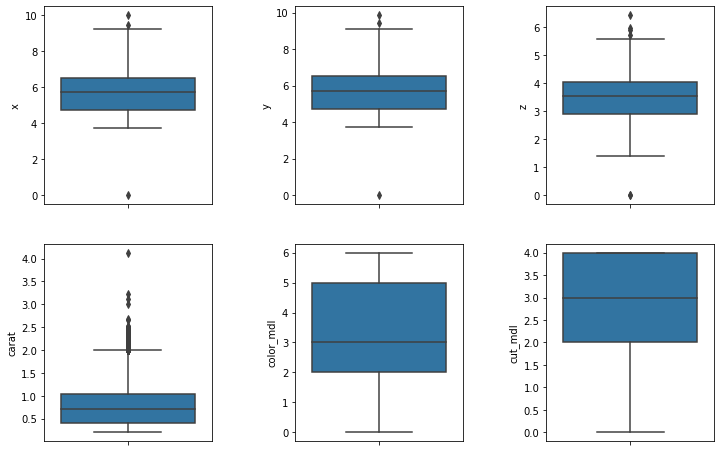

In [569]:
fig, ax = plt.subplots(2,3, figsize=(12, 8))
sns.boxplot(y=ricks_final.x, ax=ax[0,0])
sns.boxplot(y=ricks_final.y, ax=ax[0,1])
sns.boxplot(y=ricks_final.z, ax=ax[0,2])
sns.boxplot(y=ricks_final.carat, ax=ax[1,0])
sns.boxplot(y=ricks_final.color_mdl, ax=ax[1,1])
sns.boxplot(y=ricks_final.cut_mdl, ax=ax[1,2])

plt.subplots_adjust(wspace=0.5)

In [570]:
r_x_out = find_outliers(ricks_final.x.describe())
r_y_out = find_outliers(ricks_final.y.describe())
r_z_out = find_outliers(ricks_final.z.describe())
r_carat_out = find_outliers(ricks_final.carat.describe())
r_x_out, r_y_out, r_z_out, r_carat_out

([2.004999999999999, 9.245000000000001],
 [2.02, 9.219999999999999],
 [1.2262500000000007, 5.716249999999999],
 [-0.5599999999999999, 2.0])

In [571]:
# NO XYZ OUTLIERS

In [572]:
r_no_xyz_out = ricks_final.query(f'x >= {r_x_out[0]} & x <= {r_x_out[1]} & y >= {r_y_out[0]} &  y <= {r_y_out[1]} &  z >= {r_z_out[0]} &  z <= {r_z_out[1]}')
r_no_xyz_out.shape

(4994, 12)

In [573]:
# XYZ OUTLIERS

In [574]:
r_xyz_out = ricks_final.query(f'x < {r_x_out[0]} | x > {r_x_out[1]} | y < {r_y_out[0]} | y > {r_y_out[1]} | z < {r_z_out[0]} | z > {r_z_out[1]}')
r_xyz_out.shape

(6, 12)

## FINAL-FINAL

## Saving intermediary price

In [575]:
X = diamonds_model[['carat','clarity_mdl','color_mdl','cut_mdl']]
y = diamonds_model['price']
model = LinearRegression()
model.fit(X,y)
X_pred = ricks_final[['carat','clarity_mdl','color_mdl', 'cut_mdl']]
y_pred = model.predict(X_pred)

In [576]:
y_pred

array([3253.30538653,  127.83949629, 1183.86432906, ..., 5295.15091476,
       1548.94167282,  473.6971012 ])

In [577]:
ricks_final['price_predicted'] = y_pred

In [578]:
ricks_final.describe()

,carat,depth,table,x,y,z,cut_mdl,color_mdl,clarity_mdl,price_predicted
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,0.80,61.72,57.52,5.74,5.74,3.54,2.88,3.39,3.01,3912.13
std,0.47,1.46,2.24,1.12,1.11,0.69,1.12,1.71,1.66,3797.70
min,0.20,44.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00,-2250.76
25%,0.40,61.00,56.00,4.72,4.72,2.91,2.00,2.00,2.00,997.28
50%,0.71,61.80,57.00,5.71,5.72,3.53,3.00,3.00,3.00,2998.46
75%,1.04,62.50,59.00,6.53,6.52,4.03,4.00,5.00,4.00,5890.53
max,4.13,73.60,70.00,10.00,9.85,6.43,4.00,6.00,7.00,30713.32


In [430]:
ricks_final.to_csv('data/rick_int_prices.csv')

## A deeper try

In [579]:
r_no_xyz_out.describe()

,carat,depth,table,x,y,z,cut_mdl,color_mdl,clarity_mdl
count,4994.00,4994.00,4994.00,4994.00,4994.00,4994.00,4994.00,4994.00,4994.00
mean,0.80,61.72,57.52,5.73,5.73,3.54,2.88,3.39,3.01
std,0.47,1.46,2.24,1.11,1.10,0.69,1.12,1.71,1.66
min,0.20,44.00,50.00,3.73,3.71,1.41,0.00,0.00,0.00
25%,0.40,61.00,56.00,4.72,4.72,2.91,2.00,2.00,2.00
50%,0.71,61.80,57.00,5.71,5.72,3.53,3.00,3.00,3.00
75%,1.04,62.50,59.00,6.53,6.52,4.03,4.00,5.00,4.00
max,2.68,73.60,70.00,9.11,9.07,5.58,4.00,6.00,7.00


In [580]:
# MODEL: NO XYZ OUTLIERS + GROUPED BY CLARITY + CUT

results = []
for clarity in clarity_lbl:
    df = no_xyz_out.query(f'{clarity} == 1')
    model_test = reg_bygroup(df, 'color', True)[0][1]
    results.append([clarity, model_test])
results

[['clarity_i1', ('690.88', '0.91')],
 ['clarity_si2', ('1005.23', '0.95')],
 ['clarity_si1', ('819.32', '0.93')],
 ['clarity_vs2', ('1248.57', '0.94')],
 ['clarity_vs1', ('947.58', '0.92')],
 ['clarity_vvs2', ('1009.06', '0.94')],
 ['clarity_vvs1', ('569.32', '0.94')],
 ['clarity_if', ('755.49', '0.96')]]

In [581]:
clarity_lbl

['clarity_i1',
 'clarity_si2',
 'clarity_si1',
 'clarity_vs2',
 'clarity_vs1',
 'clarity_vvs2',
 'clarity_vvs1',
 'clarity_if']

In [ ]:
reg_model()

In [582]:
# RICKS NO XYZ OUTLIERS -> APPLYING MODEL
final_dfs = []
for i in clarity_lbl:
    clarity_feat = i.split('_')[1].upper()
    df = r_no_xyz_out.loc[r_no_xyz_out.clarity == clarity_feat,:]

    model = LinearRegression()
    X = no_xyz_out.query(f'{i} == 1')[['carat','color_mdl', 'cut_mdl']]
    y = no_xyz_out.query(f'{i} == 1')['price']
    model.fit(X,y)
    
    X_pred = df[['carat','color_mdl', 'cut_mdl']]
    y_pred = model.predict(X_pred)
    df['price_predicted'] = y_pred
    final_dfs.append(df)

<ipython-input-582-ff81acebdbc1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_predicted'] = y_pred
<ipython-input-582-ff81acebdbc1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_predicted'] = y_pred
<ipython-input-582-ff81acebdbc1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [583]:
r_xyz_out

,carat,cut,color,clarity,depth,table,x,y,z,cut_mdl,color_mdl,clarity_mdl
1104,3.22,Ideal,I,I1,62.60,55.00,9.49,9.42,5.92,4,1,0
1761,3.01,Premium,F,I1,62.20,56.00,9.24,9.13,5.73,3,4,0
2073,4.13,Fair,H,I1,64.80,61.00,10.00,9.85,6.43,0,2,0
2427,1.12,Premium,G,I1,60.40,59.00,6.71,6.67,0.00,3,3,0
2460,0.71,Good,F,SI2,64.10,60.00,0.00,0.00,0.00,1,4,1
2841,3.11,Fair,J,I1,65.90,57.00,9.15,9.02,5.98,0,0,0


In [584]:
# RICKS XYZ OUTLIERS -> APPLYING CCCC MODEL

df = r_xyz_out
X = diamonds_model[['carat','clarity_mdl','color_mdl','cut_mdl']]
y = diamonds_model['price']

model = LinearRegression()
model.fit(X,y)

X_pred = df[['carat','clarity_mdl','color_mdl', 'cut_mdl']]

y_pred = model.predict(X_pred)
df['price_predicted'] = y_pred
final_dfs.append(df)

<ipython-input-584-fd5afb635b40>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_predicted'] = y_pred


In [585]:
final_r = pd.concat(final_dfs, axis=0)

In [586]:
final_r.describe()

,carat,depth,table,x,y,z,cut_mdl,color_mdl,clarity_mdl,price_predicted
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,0.80,61.72,57.52,5.74,5.74,3.54,2.88,3.39,3.01,3916.59
std,0.47,1.46,2.24,1.12,1.11,0.69,1.12,1.71,1.66,3866.82
min,0.20,44.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00,-1932.07
25%,0.40,61.00,56.00,4.72,4.72,2.91,2.00,2.00,2.00,802.47
50%,0.71,61.80,57.00,5.71,5.72,3.53,3.00,3.00,3.00,2984.71
75%,1.04,62.50,59.00,6.53,6.52,4.03,4.00,5.00,4.00,5944.42
max,4.13,73.60,70.00,10.00,9.85,6.43,4.00,6.00,7.00,30713.32


In [587]:
max_carat_neg = final_r.query('price_predicted <= 0').describe().carat['max']
max_carat_neg 

0.51

In [588]:
avg_price = final_r.query(f'carat <= {max_carat_neg} & price_predicted > 0').price_predicted.mean()
avg_price

947.8441624088234

In [589]:
index = final_r.loc[(final_r.price_predicted <= 0)].index

In [590]:
for i in index:
    final_r.loc[i, 'price_predicted'] = avg_price


In [591]:
final_r.describe()

,carat,depth,table,x,y,z,cut_mdl,color_mdl,clarity_mdl,price_predicted
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,0.80,61.72,57.52,5.74,5.74,3.54,2.88,3.39,3.01,4086.76
std,0.47,1.46,2.24,1.12,1.11,0.69,1.12,1.71,1.66,3694.07
min,0.20,44.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00,2.23
25%,0.40,61.00,56.00,4.72,4.72,2.91,2.00,2.00,2.00,947.84
50%,0.71,61.80,57.00,5.71,5.72,3.53,3.00,3.00,3.00,2984.71
75%,1.04,62.50,59.00,6.53,6.52,4.03,4.00,5.00,4.00,5944.42
max,4.13,73.60,70.00,10.00,9.85,6.43,4.00,6.00,7.00,30713.32


In [592]:
final_r.query('price_predicted < 400')

,carat,cut,color,clarity,depth,table,x,y,z,cut_mdl,color_mdl,clarity_mdl,price_predicted
811,0.41,Good,F,I1,63.80,57.00,4.72,4.69,3.00,1,4,0,46.00
3121,0.43,Premium,H,I1,62.00,59.00,4.83,4.78,2.98,3,2,0,278.67
3792,0.40,Good,F,I1,63.30,60.40,4.64,4.68,2.95,1,4,0,2.23
355,0.45,Very Good,E,SI2,63.20,54.00,4.94,4.82,3.09,2,5,1,204.20
527,0.44,Premium,F,SI2,62.80,60.00,4.86,4.82,3.04,3,4,1,43.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,0.40,Good,I,IF,62.30,62.00,4.69,4.72,2.93,1,1,7,27.91
3101,0.28,Ideal,G,IF,61.30,57.00,4.25,4.27,2.60,4,3,7,231.15
3117,0.40,Ideal,I,IF,62.20,56.00,4.75,4.71,2.94,4,1,7,376.40
3279,0.24,Ideal,F,IF,62.90,55.00,3.96,3.98,2.50,4,4,7,391.96


In [593]:
index = final_r.loc[(final_r.price_predicted < 400)].index
for i in index:
    final_r.loc[i, 'price_predicted'] = 400

In [594]:
final_r.describe()

,carat,depth,table,x,y,z,cut_mdl,color_mdl,clarity_mdl,price_predicted
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,0.80,61.72,57.52,5.74,5.74,3.54,2.88,3.39,3.01,4100.00
std,0.47,1.46,2.24,1.12,1.11,0.69,1.12,1.71,1.66,3680.31
min,0.20,44.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00,400.00
25%,0.40,61.00,56.00,4.72,4.72,2.91,2.00,2.00,2.00,947.84
50%,0.71,61.80,57.00,5.71,5.72,3.53,3.00,3.00,3.00,2984.71
75%,1.04,62.50,59.00,6.53,6.52,4.03,4.00,5.00,4.00,5944.42
max,4.13,73.60,70.00,10.00,9.85,6.43,4.00,6.00,7.00,30713.32


In [451]:
final_r.to_csv('data/rick_final_prices.csv')

# Side functions

In [452]:
def test_model(X: pd.DataFrame, y:np.array):
    '''
    This funtion trains models
    '''
    model = LinearRegression()
    model.fit(X,y)
    y_pred = model.predict(X)
    
    return "{:.2f}".format(np.sqrt(mean_squared_error(y, y_pred))), "{:.2f}".format(model.score(X, y))

In [453]:
def find_outliers(series_stats):
    '''
    This function receives the stats of a DataFrame's 'column.describe()' and
    outputs a list containing the left and right outlier cuts (1.5 * IQR) of the column.
    '''

    q1 = series_stats['25%']
    q3 = series_stats['75%']
    iqr = q3 - q1
    outlier_r = (q3 + iqr * 1.5)
    outlier_l = (q1 - iqr * 1.5)
    return [outlier_l , outlier_r]

In [454]:
def reg_bygroup (df: pd.DataFrame, c_feature: str, other_cs= False) -> list:
    '''
    This function receives a dataframe where all the analysis will occur, 
    and also a specific group from the df, to test different regression models by group.
    
    - df: choose the DataFrame to base analysis 
    - group: choose one of the following -> 'cut', 'color', 'clarity'
    - other_cs: False by default, if True, includes the other 'c' features in the regression model
    -> returns [column_name, sqrd_error, error, r2_score]
    '''

    four_c = ['cut', 'color', 'clarity']
    results = []
    cols = [f'{c_feature}_'+ item.replace(' ', '_').lower() for item in list(df[c_feature].unique())]

    for item in cols:
        item_df = df.query(f'{item} == 1')
        y = item_df['price']

        if other_cs == False:        
            X = item_df[['carat', item]]
            result = test_model(X,y)
            results.append([item, result])
        else:
            two_cs = [c for c in four_c if c != c_feature]
            X = item_df[['carat', item, f'{two_cs[0]}_mdl', f'{two_cs[1]}_mdl']]
            result = test_model(X,y)
            results.append([item, result])

    return results

In [4]:
def reg_model (df: pd.DataFrame, c_feature: str, other_cs= False) -> list:
    '''
    This function receives a dataframe where all the analysis will occur, 
    and also a specific group from the df, to test different regression models by group.
    
    - df: choose the DataFrame to base analysis 
    - group: choose one of the following -> 'cut', 'color', 'clarity'
    - other_cs: False by default, if True, includes the other 'c' features in the regression model
    -> returns the regression model
    '''

    four_c = ['cut', 'color', 'clarity']
    results = {}
    cols = [f'{c_feature}_'+ item.replace(' ', '_').lower() for item in list(df[c_feature].unique())]

    for item in cols:
        item_df = df.query(f'{item} == 1')
        y = item_df['price']

        if other_cs == False:        
            X = item_df[['carat', item]]
        else:
            two_cs = [c for c in four_c if c != c_feature]
            X = item_df[['carat', item, f'{two_cs[0]}_mdl', f'{two_cs[1]}_mdl']]

        model = LinearRegression()
        model.fit(X,y)
        results[item] = model

    return results

# Codebook

## The 4 Cs

### CUT

- Refers to the quality of the tiny surfaces, or facets.
- Influenced by the human hand, is often considered the most important.
- A well cut diamond may be given a higher quality / value than one that is larger or of a better colour.

### CARAT

- Carat is a measure of weight, not size. 
- 1 carat is equal to 200 milligrams.
- Larger diamonds are rare -> more valuable than the equivalent weight in several smaller diamonds, assuming all other qualities are equal.

### COLOUR

- graded according to the intensity of their colour.

### CLARITY

- Refers to how many ‘inclusions’ there are in a diamond. 

## Dictionary 

In [489]:
cuts = {'Ideal': 4,
        'Premium' : 3,
        'Very Good': 2,
        'Good' : 1,
        'Fair': 0}

In [485]:
cut_lbl = [ 'cut' +'_'+ key.lower().replace(' ','_') for key in cuts.keys()]

In [490]:
colors = {'J': 0, 
          'I': 1, 
          'H': 2, 
          'G': 3,
          'F': 4, 
          'E': 5, 
          'D': 6}

In [16]:
color_lbl = [ 'color' +'_'+ key.lower().replace(' ','_') for key in colors.keys()]

In [567]:
clarity = {'I1': 0,
           'SI2': 1,
           'SI1': 2, 
           'VS2': 3, 
           'VS1': 4, 
           'VVS2': 5, 
           'VVS1': 6, 
           'IF': 7}

In [412]:
clarity_lbl = [ 'clarity' +'_'+ key.lower().replace(' ','_') for key in clarity.keys()]
clarity_lbl

['clarity_i1',
 'clarity_si2',
 'clarity_si1',
 'clarity_vs2',
 'clarity_vs1',
 'clarity_vvs2',
 'clarity_vvs1',
 'clarity_if']

# Sources

https://www.debeersgroup.com/a-diamonds-journey/the-4cs

http://www.cprm.gov.br/publique/Redes-Institucionais/Rede-de-Bibliotecas---Rede-Ametista/Fatores-Que-Determinam-o-Preco-das-Gemas-1097.html